In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from config import key
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb() #this is needed for SQL Alchemy because they need a MySQL Library 

### Store CSV into DataFrame and clean data 

The databases/df below were divided mantaining same order from original source. To review more detailg please go to https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)


# mortality7

In [3]:
csv_file = "../Resources/Kaggle/master.csv"
df = pd.read_csv(csv_file)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.sum(axis = 0, skipna = True)

country               AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...
year                                                           55675008
sex                   malemalefemalemalemalefemalefemalefemalemalefe...
age                   15-24 years35-54 years15-24 years75+ years25-3...
suicides_no                                                     6748420
population                                                  51322158436
suicides/100k pop                                                356544
country-year          Albania1987Albania1987Albania1987Albania1987Al...
HDI for year                                                    6495.49
 gdp_for_year ($)     2,156,624,9002,156,624,9002,156,624,9002,156,6...
gdp_per_capita ($)                                            469225040
generation            Generation XSilentGeneration XG.I. GenerationB...
dtype: object

In [5]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [6]:
suicide = df.iloc[:,:6]
suicide.head()

,country,year,sex,age,suicides_no,population
0,Albania,1987,male,15-24 years,21,312900
1,Albania,1987,male,35-54 years,16,308000
2,Albania,1987,female,15-24 years,14,289700
3,Albania,1987,male,75+ years,1,21800
4,Albania,1987,male,25-34 years,9,274300


In [7]:
# Connecting to SQL. To run this, remember to add a config file with your SQL key
rds_connection_string = (f"root:{key}@127.0.0.1/mortality")
engine = create_engine(f'mysql://{rds_connection_string}')

In [8]:
# Insert tables to SQL  
engine.table_names()
suicide.to_sql(name='suicide', con=engine, if_exists='append', index=True)

In [9]:
suicide_df = pd.read_sql_query('select * from suicide', con=engine)
suicide_df.head()

,index,country,year,age,suicides_no,population
0,0,Albania,1987,15-24 years,21,312900
1,1,Albania,1987,35-54 years,16,308000
2,2,Albania,1987,15-24 years,14,289700
3,3,Albania,1987,75+ years,1,21800
4,4,Albania,1987,25-34 years,9,274300


In [10]:
suicide_df.drop(['index'], axis=1, inplace=True)

In [11]:
group_suicide = suicide_df.groupby(["year","country"]).sum()
group_suicide.head()

suicides_no  population
year country                                     
1985 Antigua and Barbuda            0       62574
     Argentina                   1988    27090800
     Australia                   1861    14562500
     Austria                     2091     7110115
     Bahamas                        1      203700

In [12]:
group_suicide["Suicide_rate_per_100k"] = ((group_suicide["suicides_no"]/group_suicide["population"])*100000)  

In [13]:
group_suicide.tail()

suicides_no  population  Suicide_rate_per_100k
year country                                                    
2016 Netherlands         1886    14239554              13.244797
     Qatar                 68     2213121               3.072584
     Romania             1953    16644905              11.733320
     Sweden              1130     8125852              13.906234
     Thailand            4117    53442001               7.703679

In [14]:
year_rate_df = pd.DataFrame

In [15]:
group_suicide.drop(['suicides_no','population'], axis=1, inplace=True)

In [16]:
year_rate_df = group_suicide.copy()

In [17]:
year_rate_df.head()

Suicide_rate_per_100k
year country                                   
1985 Antigua and Barbuda               0.000000
     Argentina                         7.338285
     Australia                        12.779399
     Austria                          29.408807
     Bahamas                           0.490918

In [18]:
year_rate_df.reset_index(inplace=True)

In [19]:
year_rate_df.head()

,year,country,Suicide_rate_per_100k
0,1985,Antigua and Barbuda,0.000000
1,1985,Argentina,7.338285
2,1985,Australia,12.779399
3,1985,Austria,29.408807
4,1985,Bahamas,0.490918


In [20]:
year_rate_df.drop(['country'], axis=1, inplace=True)

In [21]:
year_rate_df.head()

,year,Suicide_rate_per_100k
0,1985,0.000000
1,1985,7.338285
2,1985,12.779399
3,1985,29.408807
4,1985,0.490918


In [36]:
year_rate_df.groupby("year").sum()

,index,Suicide_rate_per_100k
year,,
1985,1128,460.530610
1986,3432,456.441340
1987,6615,531.825661
1988,8526,529.617190
1989,11674,571.042605
1990,18080,702.832145
1991,22176,742.104476
1992,26715,770.260318
1993,30940,793.362828


In [37]:
year = year_rate_df.groupby("year").sum()
year.head()

,index,Suicide_rate_per_100k
year,,
1985,1128,460.530610
1986,3432,456.441340
1987,6615,531.825661
1988,8526,529.617190
1989,11674,571.042605


In [38]:
year.reset_index(inplace=True)

In [39]:
year.head()

,year,index,Suicide_rate_per_100k
0,1985,1128,460.530610
1,1986,3432,456.441340
2,1987,6615,531.825661
3,1988,8526,529.617190
4,1989,11674,571.042605


In [40]:
year.drop(['index'], axis=1, inplace=True)

In [41]:
year.head()

,year,Suicide_rate_per_100k
0,1985,460.530610
1,1986,456.441340
2,1987,531.825661
3,1988,529.617190
4,1989,571.042605


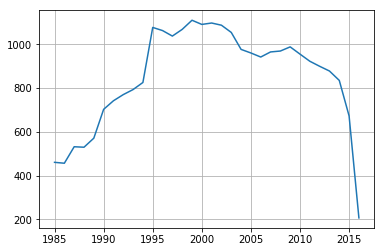

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

t = year["year"]
s = year["Suicide_rate_per_100k"]

fig, ax = plt.subplots()
ax.plot(t, s)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("suicide_rate_per_100k_by_year.png")
plt.show()

